# Comparison Example : scores

In this jupyter notebook we present the implementation of the gridness score as defined by by Sargolini et al 2006 https://pubmed.ncbi.nlm.nih.gov/16675704/. 

We conduct an autocorrelation analysis of the smoothed spatial rate map. From this analysis, we identified six peaks closest to the central peak and encompassed them within a ring, excluding the central peak. The purpose of this step was to examine the periodicity between these fields . Subsequently, we performed a rotational autocorrelation of this ring and observed the correlations' periodic patterns. To quantify the gridness, we computed a gridness score. This score was determined as the difference between the lowest correlation observed at 60 or 120 degrees of rotation and the highest correlation observed at 30, 90, or 150 degrees of rotation. The results of this analysis are presented as 'gridness measure 1

Generraly a score larger than [0.2] clasify as a grid cell.


 
The code was appadted from:

https://github.com/rhayman/ephysiopy/blob/12ee57a858161daa44546b75853a3333097ceb8a/ephysiopy/common/fieldcalcs.py#L743

We note that other measures have been developped to compute the gridness of a neural representation. We aim to implement a larger variety of score over time.



In [1]:
import sys
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from neuralplayground.arenas import Wernle2018, MergingRoom, Sargolini2006, Simple2D, BasicSargolini2006,Hafting2008
from neuralplayground.agents import Weber2018, Stachenfeld2018, RandomAgent, LevyFlightAgent
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Experimental results 

We compute the gridness score for various experimental recordings 

###  Sargolini 

The get_scores function gives as out-put the spacial auto correlogram as well as various measures extracted from a spatial auto correlogram, including the grid score. 



In [3]:
sargolini_data = Sargolini2006Data(verbose=False)
data_path = data_path = "../../neuralplayground/experiments/sargolini_2006/"
env = Sargolini2006(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)

# Change the recording_index=1 to see differernt celss
r_out_im,x_bin, y_bin = env.recording_tetr(recording_index=1)


GridScorer_SR = GridScorer(x_bin - 1)
GridScorer_SR.plot_grid_score(r_out_im=r_out_im, plot= True)
score = GridScorer_SR.get_scores(r_out_im)

print('GridScorer_Sargo')
print(score)


KeyError: "None of ['rec_index'] are in the columns"

###  Hafting


(array([[        nan, -1.00261056,  0.32731154, ..., -0.82813791,
        -1.00011965,         nan],
       [-1.00000006, -0.64830588, -0.34718793, ..., -0.69713944,
        -0.79543406, -0.99999072],
       [-0.95461081, -0.74074656, -0.47284481, ..., -0.61692907,
        -0.7182609 , -0.84023173],
       ...,
       [-0.84023173, -0.7182609 , -0.61692907, ..., -0.47284481,
        -0.74074656, -0.95461081],
       [-0.99999072, -0.79543407, -0.69713945, ..., -0.34718793,
        -0.64830588, -1.00000006],
       [        nan, -1.00012016, -0.82813803, ...,  0.32731155,
        -1.00261055,         nan]]), {'gridscore': -0.014216061360712517, 'scale': 122.48265183282079, 'orientation': -0.0, 'closest_peak_coords': array([[  0, 138],
       [ 38, 260],
       [ 38,  78],
       [  0, 320],
       [  0,  40],
       [ 38,  20]]), 'dist_to_centre': array([[False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, 

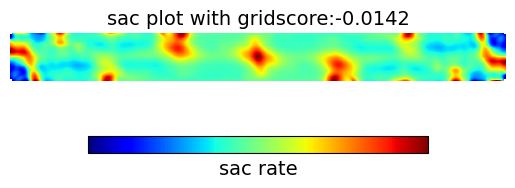

In [6]:
hafting_data = Hafting2008Data(verbose=False)
data_path = data_path = "../../neuralplayground/experiments/hafting_2008/"
env = Hafting2008(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)
r_out_im,x_bin, y_bin = env.recording_tetr(recording_index=1)
GridScorer_SR = GridScorer(x_bin - 1)
GridScorer_SR.plot_grid_score(r_out_im=r_out_im, plot= True)
score = GridScorer_SR.get_scores(r_out_im)
print(score)

The plot_sac function returns a plot of the auto correlogram.

### Wernle

GridScorer_SR
(array([[        nan,  1.0000003 ,  0.83914069, ..., -0.93620578,
        -1.00000001,         nan],
       [-1.00003356,  0.00100177,  0.19602255, ..., -0.86863773,
        -0.77696032, -1.00000107],
       [-0.96454165, -0.08861436,  0.0110059 , ..., -0.71652606,
        -0.53139663, -0.98928441],
       ...,
       [-0.98928435, -0.53139663, -0.71652606, ...,  0.01100589,
        -0.08861436, -0.96454182],
       [-1.00000075, -0.77696032, -0.86863773, ...,  0.19602255,
         0.00100176, -1.00003473],
       [        nan, -1.00000001, -0.93620578, ...,  0.83914068,
         1.00000021,         nan]]), {'gridscore': 0.7909881908447487, 'scale': 27.586228448267445, 'orientation': -0.0, 'closest_peak_coords': array([[110, 124],
       [ 88,  74],
       [119,  80],
       [ 79, 118],
       [ 70,  92],
       [128, 106]]), 'dist_to_centre': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, Fal

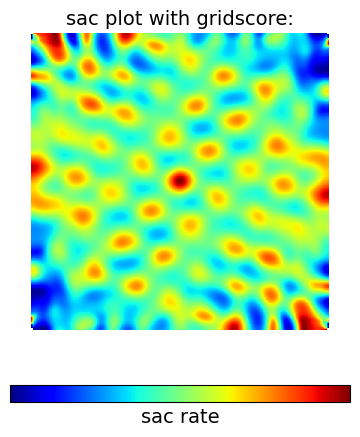

In [20]:
wernle_data =  Wernle2018Data()
data_path = data_path = "../../neuralplayground/experiments/wernle_2018/"
h, x_bin, y_bin = wernle_data.recording_tetr()
r_out_im = h.reshape((x_bin.size, y_bin.size))
GridScorer_Wernle = GridScorer(x_bin.size-1)
score_Wernle = GridScorer_Wernle.get_scores(r_out_im)
GridScorer_Wernle.plot_sac(score_Wernle[0])
print('GridScorer_SR')
print(score)


In [10]:
env = Wernle2018(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)
ax = env.plot_recording_tetr(recording_index=40)

FileNotFoundError: [Errno 2] No such file or directory: '../../neuralplayground/experiments/wernle_2018/nn_Data+Code/data/Figures_1_2_3/ratemaps.mat'

In [12]:
print('GridScorer_SR')
print(score_Wernle[1])

GridScorer_SR
{'gridscore': 0.7909881908447487, 'scale': 27.586228448267445, 'orientation': -0.0, 'closest_peak_coords': array([[110, 124],
       [ 88,  74],
       [119,  80],
       [ 79, 118],
       [ 70,  92],
       [128, 106]]), 'dist_to_centre': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'ellipse_axes': (37.406864475114986, 33.12701923294519), 'ellipse_angle': 0.17848714501650464, 'ellipseXY': array([[ 36.81259705,   6.64125049],
       [ 35.75826906,  10.75561652],
       [ 34.11679128,  14.69337562],
       [ 31.91511672,  18.38986991],
       [ 29.18939684,  21.78440303],
       [ 25.98438786,  24.82123687],
       [ 22.35271596,  27.45050667],
       [ 18.35401307,  29.62

## Agents results 

We compute the gridness score for various Agents output recordings 

### Weber

100%|███████████████████████████████████████████████████████████████████| 4900/4900 [00:02<00:00, 2361.51it/s]


  0%|          | 0/40 [00:00<?, ?it/s]

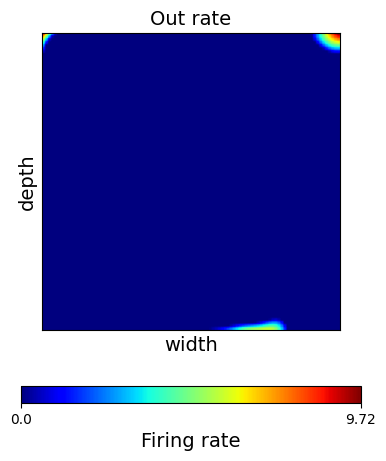

In [17]:
# Parameters for a square environment
room_width = [-10,10]
room_depth = [-10,10]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5

# Init environment
envsimple = Simple2D(arena_x_limits = room_width,
                     arena_y_limits = room_depth,
                     time_step_size = time_step_size,
                     agent_step_size = agent_step_size)

exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
roh = 1
agent_Webber = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                  sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=roh,
                  Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                  alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

plot_every = 100000  
total_iters = 0
n_steps = 40
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action, the first to numbers in the observation are the xy position of the agent
    obs = obs[:2]
    action = agent_Webber.act(obs)
    # rate = agent.update()
    agent_Webber.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0:
        agent_Webber.plot_rate_map()


GridScorer_Webber
(array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]), {'gridscore': nan, 'scale': nan, 'orientation': nan, 'closest_peak_coords': array([], shape=(0, 2), dtype=int64), 'dist_to_centre': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'ellipse_axes': None, 'ellipse_angle': (None, None), 'ellipseXY': None, 'circleXY': None, 'im_centre': (198, 198), 'rotationArr': nan, 'rotationCorrVals': nan})


/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:112: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:468: RuntimeWarning: All-NaN slice encountered
  in_range = (np.nanmin(image), np.nanmax(image))
/Users/clementine/Documents/UCL/lectures/NeuralPlayground/neuralplayground/comparison/metrics.py:472: UserWarning: One or more intensity levels are NaN. Rescaling will broadcast NaN to the full im

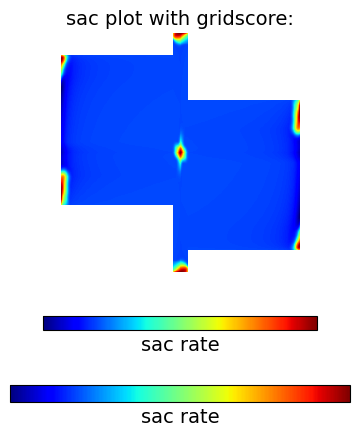

In [32]:
print('GridScorer_Webber')

r_out_im = agent_Webber.get_rate_map_matrix()
GridScorer_SR = GridScorer(agent_Webber.resolution_width)
GridScorer_SR.plot_grid_score(r_out_im=r_out_im, plot= True)
score = GridScorer_SR.get_scores(r_out_im)
GridScorer_Wernle.plot_sac(score[0])
print(score)

### Stachenfeld

GridScorer_SR
(array([[       nan, 1.        , 0.97784597, ..., 0.90282336, 1.        ,
               nan],
       [1.        , 0.99999909, 0.97426443, ..., 0.92344076, 0.99635946,
        1.        ],
       [0.97988294, 0.97630562, 0.96207696, ..., 0.92641685, 0.92265698,
        0.89902901],
       ...,
       [0.89902901, 0.92265698, 0.92641685, ..., 0.96207696, 0.97630562,
        0.97988294],
       [1.        , 0.99635946, 0.92344076, ..., 0.97426443, 0.99999909,
        1.        ],
       [       nan, 1.        , 0.90282336, ..., 0.97784597, 1.        ,
               nan]]), {'gridscore': -0.7963548350429477, 'scale': 8.54400374531753, 'orientation': -0.0, 'closest_peak_coords': array([[27, 22],
       [27, 16],
       [22, 27],
       [22, 11],
       [11, 16],
       [11, 22]]), 'dist_to_centre': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,

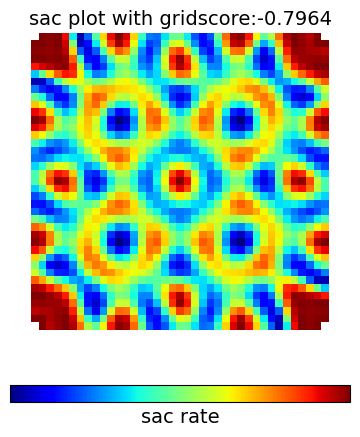

In [31]:
agent_step_size = 1
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 10000
n_episode = 10000
state_density = (1 / agent_step_size)
twoDvalue = True

agent_SR = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=envsimple.room_width, room_depth=envsimple.room_depth, state_density=state_density, twoD=twoDvalue)

print('GridScorer_SR')
r_out_im=agent_SR.get_rate_map_matrix(eigen_vector=30)

GridScorer_SR = GridScorer(agent_SR.resolution_width)
GridScorer_SR.plot_grid_score(r_out_im=r_out_im, plot= True)
score = GridScorer_SR.get_scores(r_out_im)

print(score)

In [3]:
import importlib
import os
import pickle
import pandas as pd
import torch
import matplotlib.pyplot as plt

import neuralplayground.agents.whittington_2020_extras.whittington_2020_analyse as analyse
from neuralplayground.plotting import PlotSim

In [4]:
simulation_id = "TEM_custom_plot_sim"
run = 1
save_path = "results_sim/" + "run_" + str(run) + "/"
training_dict = pd.read_pickle(os.path.join(os.getcwd(), save_path, "params.dict"))
model_weights = pd.read_pickle(os.path.join(save_path, "agent"))
model_spec = importlib.util.spec_from_file_location("model", save_path + "whittington_2020_model.py")
model = importlib.util.module_from_spec(model_spec)
model_spec.loader.exec_module(model)
params = pd.read_pickle(os.path.join(save_path, "agent_hyper"))
tem = model.Model(params)
tem.load_state_dict(model_weights)
tem.eval()

Model(
  (alpha): ParameterList(
      (0): Parameter containing: [torch.float32 of size ]
      (1): Parameter containing: [torch.float32 of size ]
      (2): Parameter containing: [torch.float32 of size ]
      (3): Parameter containing: [torch.float32 of size ]
      (4): Parameter containing: [torch.float32 of size ]
  )
  (w_p): ParameterList(
      (0): Parameter containing: [torch.float32 of size ]
      (1): Parameter containing: [torch.float32 of size ]
      (2): Parameter containing: [torch.float32 of size ]
      (3): Parameter containing: [torch.float32 of size ]
      (4): Parameter containing: [torch.float32 of size ]
  )
  (g_init): ParameterList(
      (0): Parameter containing: [torch.float32 of size 30]
      (1): Parameter containing: [torch.float32 of size 30]
      (2): Parameter containing: [torch.float32 of size 24]
      (3): Parameter containing: [torch.float32 of size 18]
      (4): Parameter containing: [torch.float32 of size 18]
  )
  (logsig_g_init): Param

In [5]:
plotting_loop_params = {"n_episode": 5000}
sim = PlotSim(
    simulation_id=simulation_id,
    agent_class=training_dict["agent_class"],
    agent_params=training_dict["agent_params"],
    env_class=training_dict["env_class"],
    env_params=training_dict["env_params"],
    plotting_loop_params=plotting_loop_params,
)
print(sim)


---> Initializing models
---> Plotting loop
---> Finished


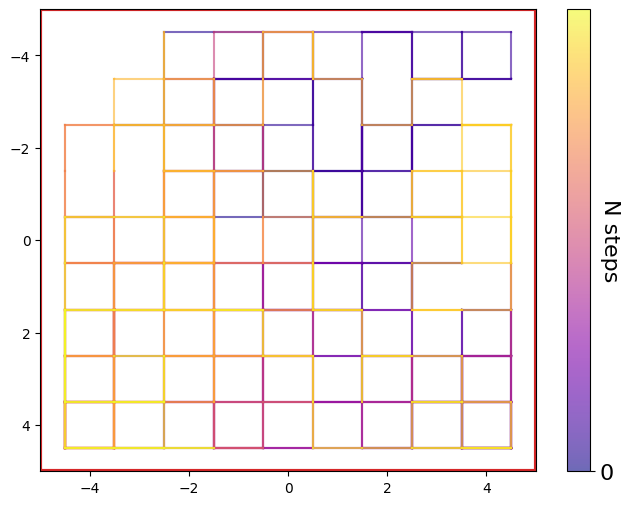

In [6]:
trained_agent, trained_env = sim.plot_sim(save_path, n_walks=1000, random_state=False, custom_state=[0.5,0.5])
trained_env.plot_trajectory()
# Load environments and model_input using pickle
with open(os.path.join(save_path, "NPG_environments.pkl"), "rb") as f:
    environments = pickle.load(f)
with open(os.path.join(save_path, "NPG_model_input.pkl"), "rb") as f:
    model_input = pickle.load(f)


In [7]:
training_dict["params"] = training_dict["agent_params"]
del training_dict["agent_params"]
agent = training_dict["agent_class"](**training_dict["params"])

In [8]:
with torch.no_grad():
    forward = tem(model_input, prev_iter=None)

In [9]:
include_stay_still = False
shiny_envs = [False, False, False, False]
env_to_plot = 0
envs_to_avg = shiny_envs if shiny_envs[env_to_plot] else [not shiny_env
                                                           for shiny_env in shiny_envs]

In [10]:
correct_model, correct_node, correct_edge = analyse.compare_to_agents(
    forward, tem, environments, include_stay_still=include_stay_still)
zero_shot = analyse.zero_shot(forward, tem, environments, 
                              include_stay_still=include_stay_still)
occupation = analyse.location_occupation(forward, tem, environments)
g, p = analyse.rate_map(forward, tem, environments)
from_acc, to_acc = analyse.location_accuracy(forward, tem, environments)

(10, 10)
[10, 8, 10, 12, 8, 10, 12, 10, 8, 10, 12, 10, 8, 10, 12, 10]


/Users/clementine/Documents/UCL/NeuralPlayground/neuralplayground/comparison/metrics.py:122: RuntimeWarning: invalid value encountered in divide
  A = np.squeeze(mapCovar / mapStd / mapStd[::-1, :, :][:, ::-1, :][:, :, :])


NameError: name 'r_out_im' is not defined

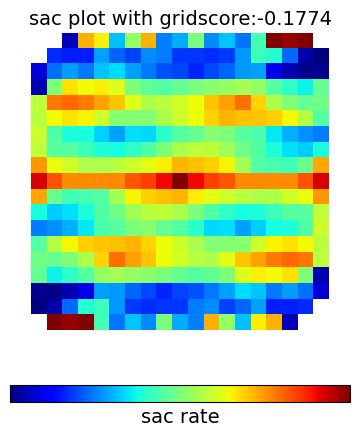

In [13]:
rate_map_mat = agent.get_rate_map_matrix(g,1,2)
print(rate_map_mat.shape)
print(agent.room_depths)
GridScorer = GridScorer(rate_map_mat.shape[0])
GridScorer.plot_grid_score(r_out_im = rate_map_mat, plot= True)
score = GridScorer.get_scores(r_out_im)
print(score)